**Credit_Card**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
cd /content/drive/MyDrive/DeepLearningAssignment/

/content/drive/MyDrive/DeepLearningAssignment


In [ ]:
df = pd.read_csv('./creditcard.csv')

In [ ]:
non_fraud=df[df["Class"]==0]
fraud = df[df["Class"]==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [ ]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [ ]:
data = fraud.append(non_fraud, ignore_index=True)
data.shape
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
x_data= data.drop(columns="Class", axis=0)
label = data["Class"]

In [ ]:
train_data, test_data, train_labels, test_labels=train_test_split(x_data, label, test_size=0.3, random_state=0, stratify = label)

In [ ]:
train_data.shape, test_data.shape

((688, 30), (296, 30))

In [ ]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std

In [ ]:
train_labels=np.asarray(train_labels).astype(dtype="float64")
test_labels=np.asarray(test_labels).astype(dtype="float64")

In [ ]:
model= models.Sequential()
model.add(layers.Dense(20, activation="relu", input_shape=(train_data.shape[1],)))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(10, activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(8,activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(6,activation="relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history=model.fit(train_data, train_labels, epochs=100, validation_split=.2)

Epoch 1/100
18/18 [==============================] - 1s 21ms/step - loss: 0.6743 - accuracy: 0.4720 - val_loss: 0.5824 - val_accuracy: 0.6812
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5524 - accuracy: 0.7143 - val_loss: 0.5241 - val_accuracy: 0.7971
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5129 - accuracy: 0.7939 - val_loss: 0.4883 - val_accuracy: 0.8188
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4827 - accuracy: 0.8374 - val_loss: 0.4567 - val_accuracy: 0.8406
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.4232 - accuracy: 0.8917 - val_loss: 0.4273 - val_accuracy: 0.8623
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3888 - accuracy: 0.9013 - val_loss: 0.4002 - val_accuracy: 0.8768
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.3539 - accuracy: 0.9064 - val_loss: 0.3750 - val_accuracy: 0.8768
Epoch 8/100


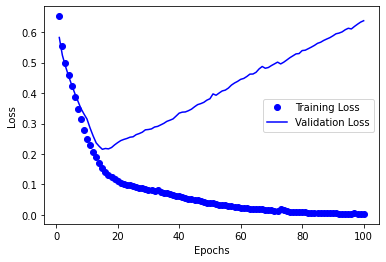

In [ ]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

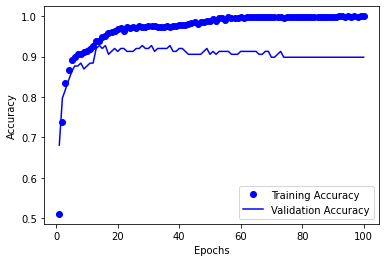

In [ ]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(1, len(acc)+1)
plt.plot(epochs[:], acc[:], "bo", label="Training Accuracy")
plt.plot(epochs[:], val_acc[:], "b", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
test_loss_score, test_acc_score=model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.9291


In [ ]:
test_acc_score *100

92.90540814399719

In [ ]:
prediction=model.predict(test_data).astype(dtype="u8")

In [ ]:
prediction[45:60]

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=uint64)

In [ ]:
test_labels[45:60]

array([0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.])